# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using Pandas and Scikit Learn.

## Agenda

How do I use the pandas library to read data into Python?

How do I use the matplotlib library to visualize data?

What is linear regression, and how does it work?

How do I train and interpret a linear regression model in scikit-learn?

What are some evaluation metrics for regression problems?

In [51]:
%matplotlib inline

#imports
from numpy import *
import numpy as np
import matplotlib.pyplot as plt


#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.


#### Reading data using pandas
Pandas: popular Python library for data exploration, manipulation, and analysis

Anaconda users: pandas is already installed

In [4]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head()


,Hours_of_Study,Test_Scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


#### Get the input data --> X, Y

In [25]:
## Hours_of_Study and Test_Scores are called Series according to Pandas.
X = data["Hours_of_Study"]

Y = data["Test_Scores"]

 
# check the type and shape of X
print("X type is ",type(X))
print("X shape is ",X.shape)

# check the type and shape of Y
print("Y type is ",type(Y))
print("Y shape is ",Y.shape)

X = X.values.reshape(-1,1)
print("X after reshape is ",X.shape)

X type is  <class 'pandas.core.series.Series'>
X shape is  (100,)
Y type is  <class 'pandas.core.series.Series'>
Y shape is  (100,)
X after reshape is  (100, 1)


Text(0, 0.5, 'Test scores')

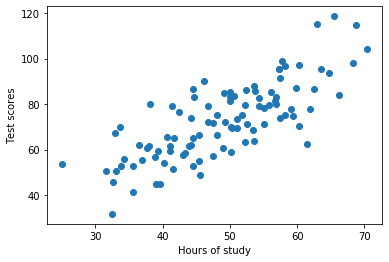

In [56]:
plt.scatter(X,Y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

#### Splitting the data into train and validation


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [41]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70, 1)
(70,)
(30, 1)
(30,)


## Linear regression in scikit-learn

In [42]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coefficients of the model

In [43]:
print("W0 is",linreg.intercept_)
print("W1 is", linreg.coef_)

W0 is 12.581630382942727
W1 is [1.21211468]


#### Linear Regression equation
y = W0 + W1* Hours_of_Study 

y = 12.58 + 1.21* Hours_of_Study

In [48]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [53]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

11.971834330064898


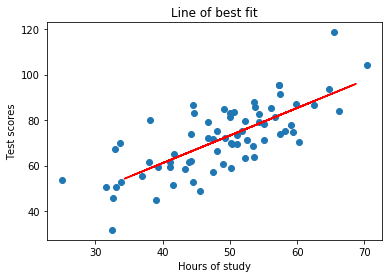

In [54]:
#Plot dataset
plt.scatter(X_train, y_train)
#Predict y values
# pred = m * x + b
#Plot predictions as line of best fit
plt.plot(X_test, y_pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()